### Instructor Demo: Diversification

This program reads in the CSV datasets of several stocks and calculates a correlation table and heatmap to determine the semiconductor stock that is least correlated to `JNJ` and `HD`.

In [2]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [3]:
# Set file paths
hd_data = Path("../Resources/HD.csv")
jnj_data = Path("../Resources/JNJ.csv")
intc_data = Path("../Resources/INTC.csv")
amd_data = Path("../Resources/AMD.csv")
mu_data = Path("../Resources/MU.csv")
nvda_data = Path("../Resources/NVDA.csv")
tsm_data = Path("../Resources/TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
amd = pd.read_csv(amd_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")

intc.head()

,INTC
date,
5/14/19,45.17
5/13/19,44.76
5/10/19,46.20
5/9/19,46.62
5/8/19,49.24


### Combine the DataFrames

In [4]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([jnj, hd, intc, amd, mu, nvda, tsm], axis="columns", join="inner")
combined_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,66.97,191.62,45.17,27.32,38.51,162.04,41.97
5/13/19,66.49,190.34,44.76,26.24,37.38,158.45,40.99
5/10/19,67.22,194.58,46.20,27.96,38.94,168.82,42.83
5/9/19,66.04,194.58,46.62,27.21,39.27,170.19,43.25
5/8/19,66.02,195.17,49.24,27.09,39.75,173.92,43.70


### Sort the DataFrame

In [5]:
# sort the dataframe in ascending order to ensure correct pct_change calculation
combined_df.sort_index(ascending=True, inplace=True)
combined_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
1/10/11,24.6332,34.39,20.69,9.19,8.55,20.631,13.22
1/10/12,39.0728,43.53,25.59,5.71,7.25,14.480,13.77
1/10/13,39.7553,63.62,21.80,2.62,7.42,12.230,18.18
1/10/14,57.0491,82.01,25.53,4.17,23.71,15.730,16.90
1/10/17,56.0700,136.10,36.54,11.44,22.48,106.470,30.07


### Calculate Daily Returns

In [11]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change().dropna()
daily_returns.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
1/10/12,0.586184,0.265775,0.236829,-0.378672,-0.152047,-0.298144,0.041604
1/10/13,0.017467,0.461521,-0.148105,-0.541156,0.023448,-0.155387,0.320261
1/10/14,0.435006,0.289060,0.171101,0.591603,2.195418,0.286182,-0.070407
1/10/17,-0.017162,0.659554,0.431257,1.743405,-0.051877,5.768595,0.779290
1/10/18,0.011949,0.409258,0.163109,0.045455,0.926601,1.100873,0.373462


### Calculate Correlation

In [7]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
JNJ,1.000000,0.574880,0.631309,0.442925,0.524228,0.341283,0.672558
HD,0.574880,1.000000,0.712120,0.115256,0.536763,0.336181,0.865272
INTC,0.631309,0.712120,1.000000,0.373484,0.584800,0.511216,0.805858
AMD,0.442925,0.115256,0.373484,1.000000,0.311998,0.782963,0.411280
MU,0.524228,0.536763,0.584800,0.311998,1.000000,0.347663,0.585045
NVDA,0.341283,0.336181,0.511216,0.782963,0.347663,1.000000,0.608762
TSM,0.672558,0.865272,0.805858,0.411280,0.585045,0.608762,1.000000


### Plot Correlation

<AxesSubplot:>

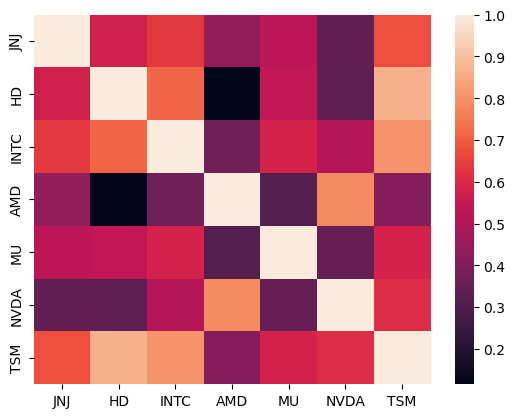

In [8]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)

<AxesSubplot:>

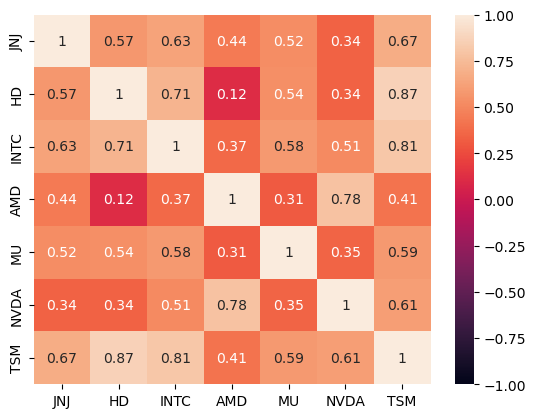

In [12]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Which semiconductor stock would be the best candidate to add to the existing portfolio?

`AMD` stock would be the best candidate to add to the existing portfolio as it is the stock that has the least correlation with `JNJ` and `HD`.